**Replace with your name and a brief description of the notebook.**

# Homework 14

This homework uses the Green taxi data from Homework 2.  The 2021 green taxi trip data from NYC Open Data was filtered to only be trips with a pickup date and time on Feb. 3, 2021. 

Filtered trip data URL: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv)

We will try to predict which trips involve tolls using only the length of the trip.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import seaborn as sns
import statsmodels.formula.api as smf
 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

%matplotlib inline

### Question 1: Loading and cleaning the data

a) Load the data into Python.

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/Feb3_2021_Green_Taxi_Trip_Data.csv")

1b) Create a new column call `paid_toll` that contains a 1 if the value in the `tolls_amount` column is greater than 0 and a 0 otherwise.  Hint:  See Lab 1, Section 6.

In [9]:
def is_positive(x):
    if x > 0:
        return 1
    else:
        return 0

In [10]:
data["paid_toll"] = data["tolls_amount"].apply(is_positive)

1c) Create a new dataframe (or change the current one) that only contains the columns `trip_distance` and `paid_toll`.

In [11]:
data = data[["trip_distance", "paid_toll"]]

### Question 2: Exploratory Data Analysis

2a) Plot a scatterplot with `trip_distance` on the x axis and `paid_toll` on the y axis.

<AxesSubplot:xlabel='trip_distance', ylabel='paid_toll'>

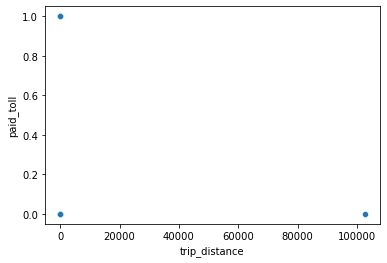

In [16]:
sns.scatterplot(x="trip_distance", y="paid_toll", data=data)

2b) What do you notice about the plot?  Is this what you expected? 

**Answer 2b:** The spread of the trip distances does not seem to vary much, except for the outlier that is over 100,000 miles

2c) Remove the outlier from the data.

In [19]:
data = data[data["trip_distance"] < 20000]

2d) Replot the scatterplot with `trip_distance` on the x axis and `paid_toll` on the y axis without the outlier.

<AxesSubplot:xlabel='trip_distance', ylabel='paid_toll'>

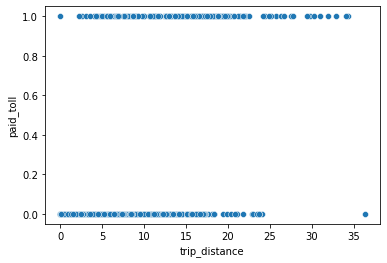

In [20]:
sns.scatterplot(x="trip_distance", y="paid_toll", data=data)

2e) Do you think a logistic regression model can predict whether a taxi customer paid a toll based on trip distance will work?  Why or why not?

**2e answer:** I don't think so because there is no linear pattern in the data. At a base level, there seems to be no discernable pattern as to who pays tolls and when.

### Question 3: Logistic regression

a) Create a logistic model where paid_toll is the dependent variable and trip_distance is the independent variable.

In [23]:
logit_model = smf.logit('paid_toll ~ trip_distance',data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.149845
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              paid_toll   No. Observations:                 2280
Model:                          Logit   Df Residuals:                     2278
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Mar 2022   Pseudo R-squ.:                  0.4466
Time:                        22:51:48   Log-Likelihood:                -341.65
converged:                       True   LL-Null:                       -617.36
Covariance Type:            nonrobust   LLR p-value:                6.188e-122
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -5.0482      0.214    -23.620      0.000      -5.467      -4.629
trip_distance     0.3266      0.018     17.863      0.000       0.291       0.362
=================================================================================
"""

3b)  What is the R-squared value for your logistic model?  What does it suggest about the fit of the model?

**3b answer:** The R2 value of the model 0.4466. This suggests that the model may be underfitted, as there is a considerable amount of variance (the range for this variable was 0 to 1, so .4466 is quite extreme).

3c)  What is the equation of your logistic regression model?  The equation below is written in Latex, which is a system for typing math equations.  Double click on this cell, and replace the part of the equation that says "reg" to finish the formula.  "run" this cell (as you would a code cell) when you are finished.

**3c answer:** $$y = \frac{1}{1 + e^{-(-5.0482 -0.3266x_1)}}$$

### Question 4: Logistic regression continued

a) Plot the line of the logistic regression model from Question 3 on a scatterplot of the data.  You can use any method/package to do this.

<AxesSubplot:xlabel='trip_distance', ylabel='paid_toll'>

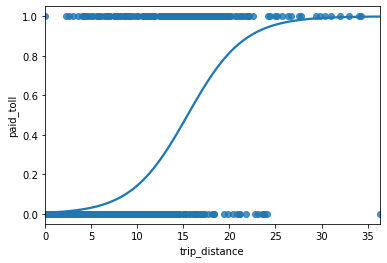

In [27]:
sns.regplot(x="trip_distance", y="paid_toll", data=data, logistic=True, ci=None)

4b)  For what trip distances will our model predict that we paid a toll, if we make this prediction when our model has y > 0.5 (where y is `paid_toll`)? 

**4b answer:** This change will occur at approximately `trip_distance ≥ 17`

### Question 5: Confusion matrix

a) Compute the confusion matrix for your logistic regression model. 

In [29]:
logit_model.pred_table()

array([[2073.,   32.],
       [  94.,   81.]])

5b) How many true positives are there?  How many true negative?  How many false positives?  How many false negatives?  

**5b answer:** There were 81 true positives and 94 false negatives.

5c) Based on the confusion matrix and the R-squared value, how good of a fit is your model?

**5c answer:** I would say that it is overall a good model given that it was 94.5% correct in its predictions.